# **요구사항1 titanic 딥러닝 모델 기본 훈련**

In [26]:
import torch
from torch import nn, optim
from torch.utils.data import random_split, DataLoader
from datetime import datetime
import wandb
import argparse

from pathlib import Path
BASE_PATH = str(Path().resolve().parent)
print("BASE_PATH:", BASE_PATH)


import sys
sys.path.append(BASE_PATH)

from _03_homeworks.homework_2.titanic_dataset \
  import get_preprocessed_dataset as TitanicDataset


def get_data():
  train_dataset, validation_dataset, test_dataset = TitanicDataset()

  train_data_loader = DataLoader(dataset=train_dataset, batch_size=wandb.config.batch_size, shuffle=True)
  validation_data_loader = DataLoader(dataset=validation_dataset, batch_size=len(validation_dataset))
  return train_data_loader, validation_data_loader

BASE_PATH: C:\Users\kmka0\git\link_dl


In [ ]:
class MyModel(nn.Module):
  def __init__(self, n_input, n_output):
    super().__init__()

    self.model = nn.Sequential(
      nn.Linear(n_input, wandb.config.n_hidden_unit_list[0]),
      nn.ReLU(),
      nn.Linear(wandb.config.n_hidden_unit_list[0], wandb.config.n_hidden_unit_list[1]),
      nn.ReLU(),
      nn.Linear(wandb.config.n_hidden_unit_list[1], n_output),
    )

  def forward(self, x):
    x = self.model(x)
    return x


def get_model_and_optimizer():
  my_model = MyModel(n_input=10, n_output=1)
  optimizer = optim.SGD(my_model.parameters(), lr=wandb.config.learning_rate)

  return my_model, optimizer


def training_loop(model, optimizer, train_data_loader, validation_data_loader):
  n_epochs = wandb.config.epochs
  loss_fn = nn.BCEWithLogitsLoss()
  next_print_epoch = 100

  for epoch in range(1, n_epochs + 1):
    loss_train = 0.0
    num_trains = 0
    for train_batch in train_data_loader:
      input=train_batch['input']
      target=train_batch['target'].unsqueeze(1).float()
      output_train = model(input)
      loss = loss_fn(output_train, target)
      loss_train += loss.item()
      num_trains += 1

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    loss_validation = 0.0
    num_validations = 0
    with torch.no_grad():
      for validation_batch in validation_data_loader:
        input=validation_batch['input']
        target=validation_batch['target'].unsqueeze(1).float()
        output_validation = model(input)
        loss = loss_fn(output_validation, target)
        loss_validation += loss.item()
        num_validations += 1

    wandb.log({
      "Epoch": epoch,
      "Training loss": loss_train / num_trains,
      "Validation loss": loss_validation / num_validations
    },step=epoch)

    if epoch >= next_print_epoch:
      print(
        f"Epoch {epoch}, "
        f"Training loss {loss_train / num_trains:.4f}, "
        f"Validation loss {loss_validation / num_validations:.4f}"
      )
      next_print_epoch += 100


def main(args):
  current_time_str = datetime.now().astimezone().strftime('%Y-%m-%d_%H-%M-%S')

  config = {
    'epochs': args.epochs,
    'batch_size': args.batch_size,
    'learning_rate': 1e-3,
    'n_hidden_unit_list': [20, 20],
  }

  wandb.init(
    mode="online" if args.wandb else "disabled",
    project="titanic_survival_prediction",
    notes="Titanic dataset binary classification",
    tags=["titanic", "classification"],
    name=current_time_str,
    config=config
  )
  print(args)
  print(wandb.config)
  train_data_loader, validation_data_loader = get_data()
  linear_model, optimizer = get_model_and_optimizer()

  print("#" * 50, 1)

  training_loop(
    model=linear_model,
    optimizer=optimizer,
    train_data_loader=train_data_loader,
    validation_data_loader=validation_data_loader
  )
  wandb.finish()

In [11]:
if __name__ == "__main__":
  parser = argparse.ArgumentParser()

  parser.add_argument(
    "--wandb", action=argparse.BooleanOptionalAction, default=True, help="True or False"
  )

  parser.add_argument(
    "-b", "--batch_size", type=int, default=512, help="Batch size (int, default: 512)"
  )

  parser.add_argument(
    "-e", "--epochs", type=int, default=1_000, help="Number of training epochs (int, default:1_000)"
  )

  args,unknown = parser.parse_known_args()

  main(args)

Namespace(wandb=True, batch_size=512, epochs=1000)
{'epochs': 1000, 'batch_size': 512, 'learning_rate': 0.001, 'n_hidden_unit_list': [20, 20]}


C:\Users\kmka0\git\link_dl\_03_homeworks\homework_2\titanic_dataset.py:128: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_df["alone"].fillna(0, inplace=True)
C:\Users\kmka0\git\link_dl\_03_homeworks\homework_2\titanic_dataset.py:147: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'title', 'family_num', 'alone'],
      dtype='object')
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  title  \
0       0.0       3    1  22.0      1      0   7.2500         2      2   
1       1.0       1    0  38.0      1      0  71.2833         0      3   
2       1.0       3    0  26.0      0      0   7.9250         2      1   
3       1.0       1    0  35.0      1      0  53.1000         2      3   
4       0.0       3    1  35.0      0      0   8.0500         2      2   
5       0.0       3    1  29.0      0      0   8.4583         1      2   
6       0.0       1    1  54.0      0      0  51.8625         2      2   
7       0.0       3    1   2.0      3      1  21.0750         2      0   
8       1.0       3    0  27.0      0      2  11.1333         2      3   
9       1.0       2    0  14.0      1      0  30.0708         0      3   

   family_num  alone  
0           1    0.

Epoch,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▅▆▆▇▇▇▇▇▇▇███
Training loss,█▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▁▂▁▂▂▁▁▁▂▂▁▂▁▂▁▁▁▂▁
Validation loss,█▆▅▄▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Epoch,1000
Training loss,0.61143
Validation loss,0.578


# **요구사항2 Activation Function과 Batch Size 변경 및 선택하기**

#### **Batch Size 16**

In [17]:
if __name__ == "__main__":
  parser = argparse.ArgumentParser()

  parser.add_argument(
    "--wandb", action=argparse.BooleanOptionalAction, default=True, help="True or False"
  )

  parser.add_argument(
    "-b", "--batch_size", type=int, default=16, help="Batch size (int, default: 512)"
  )

  parser.add_argument(
    "-e", "--epochs", type=int, default=1_000, help="Number of training epochs (int, default:1_000)"
  )

  args,unknown = parser.parse_known_args()

  main(args)

Namespace(wandb=True, batch_size=16, epochs=1000)
{'epochs': 1000, 'batch_size': 16, 'learning_rate': 0.001, 'n_hidden_unit_list': [20, 20]}


C:\Users\kmka0\git\link_dl\_03_homeworks\homework_2\titanic_dataset.py:128: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_df["alone"].fillna(0, inplace=True)
C:\Users\kmka0\git\link_dl\_03_homeworks\homework_2\titanic_dataset.py:147: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'title', 'family_num', 'alone'],
      dtype='object')
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  title  \
0       0.0       3    1  22.0      1      0   7.2500         2      2   
1       1.0       1    0  38.0      1      0  71.2833         0      3   
2       1.0       3    0  26.0      0      0   7.9250         2      1   
3       1.0       1    0  35.0      1      0  53.1000         2      3   
4       0.0       3    1  35.0      0      0   8.0500         2      2   
5       0.0       3    1  29.0      0      0   8.4583         1      2   
6       0.0       1    1  54.0      0      0  51.8625         2      2   
7       0.0       3    1   2.0      3      1  21.0750         2      0   
8       1.0       3    0  27.0      0      2  11.1333         2      3   
9       1.0       2    0  14.0      1      0  30.0708         0      3   

   family_num  alone  
0           1    0.

Epoch,▁▁▁▁▁▂▂▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▆▆▆▆▆▇▇▇▇▇████
Training loss,█▇▇▇▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▃▄▃▃▃▃▃▂▂▂▂▂▂▂▁▂▂
Validation loss,▆▆▅▅▅▅▅▅▅▅▅▄▄▅▄▅▅▄▅▄▄▄▄▄▃▂▂█▃▂▁▄▁▁▁▆▂▁▁▂
Epoch,1000
Training loss,0.42582
Validation loss,0.51461


#### **Batch Size 32**

In [18]:
if __name__ == "__main__":
  parser = argparse.ArgumentParser()

  parser.add_argument(
    "--wandb", action=argparse.BooleanOptionalAction, default=True, help="True or False"
  )

  parser.add_argument(
    "-b", "--batch_size", type=int, default=32, help="Batch size (int, default: 512)"
  )

  parser.add_argument(
    "-e", "--epochs", type=int, default=1_000, help="Number of training epochs (int, default:1_000)"
  )

  args,unknown = parser.parse_known_args()

  main(args)

Namespace(wandb=True, batch_size=32, epochs=1000)
{'epochs': 1000, 'batch_size': 32, 'learning_rate': 0.001, 'n_hidden_unit_list': [20, 20]}


C:\Users\kmka0\git\link_dl\_03_homeworks\homework_2\titanic_dataset.py:128: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_df["alone"].fillna(0, inplace=True)
C:\Users\kmka0\git\link_dl\_03_homeworks\homework_2\titanic_dataset.py:147: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'title', 'family_num', 'alone'],
      dtype='object')
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  title  \
0       0.0       3    1  22.0      1      0   7.2500         2      2   
1       1.0       1    0  38.0      1      0  71.2833         0      3   
2       1.0       3    0  26.0      0      0   7.9250         2      1   
3       1.0       1    0  35.0      1      0  53.1000         2      3   
4       0.0       3    1  35.0      0      0   8.0500         2      2   
5       0.0       3    1  29.0      0      0   8.4583         1      2   
6       0.0       1    1  54.0      0      0  51.8625         2      2   
7       0.0       3    1   2.0      3      1  21.0750         2      0   
8       1.0       3    0  27.0      0      2  11.1333         2      3   
9       1.0       2    0  14.0      1      0  30.0708         0      3   

   family_num  alone  
0           1    0.

Epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▆▆▇▇████████
Training loss,█▇▇▇▇▇▇▇▇▆▇▇▆▇▆▆▆▅▅▅▅▅▅▄▅▅▅▄▅▄▃▃▃▃▃▂▂▂▁▁
Validation loss,███▇▇▇▆▆▆▆▆▆▆▅▅▅▅▅▅▄▅▄▄▃▃▃▃▃▂▄▂▄▅▁▁▂▁▆▁▅
Epoch,1000
Training loss,0.46683
Validation loss,0.54156


#### **Batch Size 64**

In [19]:
if __name__ == "__main__":
  parser = argparse.ArgumentParser()

  parser.add_argument(
    "--wandb", action=argparse.BooleanOptionalAction, default=True, help="True or False"
  )

  parser.add_argument(
    "-b", "--batch_size", type=int, default=64, help="Batch size (int, default: 512)"
  )

  parser.add_argument(
    "-e", "--epochs", type=int, default=1_000, help="Number of training epochs (int, default:1_000)"
  )

  args,unknown = parser.parse_known_args()

  main(args)

Namespace(wandb=True, batch_size=64, epochs=1000)
{'epochs': 1000, 'batch_size': 64, 'learning_rate': 0.001, 'n_hidden_unit_list': [20, 20]}


C:\Users\kmka0\git\link_dl\_03_homeworks\homework_2\titanic_dataset.py:128: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_df["alone"].fillna(0, inplace=True)
C:\Users\kmka0\git\link_dl\_03_homeworks\homework_2\titanic_dataset.py:147: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'title', 'family_num', 'alone'],
      dtype='object')
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  title  \
0       0.0       3    1  22.0      1      0   7.2500         2      2   
1       1.0       1    0  38.0      1      0  71.2833         0      3   
2       1.0       3    0  26.0      0      0   7.9250         2      1   
3       1.0       1    0  35.0      1      0  53.1000         2      3   
4       0.0       3    1  35.0      0      0   8.0500         2      2   
5       0.0       3    1  29.0      0      0   8.4583         1      2   
6       0.0       1    1  54.0      0      0  51.8625         2      2   
7       0.0       3    1   2.0      3      1  21.0750         2      0   
8       1.0       3    0  27.0      0      2  11.1333         2      3   
9       1.0       2    0  14.0      1      0  30.0708         0      3   

   family_num  alone  
0           1    0.

Epoch,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▆▆▆▆▆▇▇▇▇▇████
Training loss,█▇▆▆▇▅▆▆▆▆▇▅▅▄▅▅▄▄▄▃▄▄▄▃▃▃▄▃▃▃▂▂▃▂▂▂▂▁▂▁
Validation loss,█▄▃▃▃▃▃▂▂▂▂▂▂▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁
Epoch,1000
Training loss,0.54886
Validation loss,0.5308


#### **Batch Size 128**

In [20]:
if __name__ == "__main__":
  parser = argparse.ArgumentParser()

  parser.add_argument(
    "--wandb", action=argparse.BooleanOptionalAction, default=True, help="True or False"
  )

  parser.add_argument(
    "-b", "--batch_size", type=int, default=128, help="Batch size (int, default: 512)"
  )

  parser.add_argument(
    "-e", "--epochs", type=int, default=1_000, help="Number of training epochs (int, default:1_000)"
  )

  args,unknown = parser.parse_known_args()

  main(args)

Namespace(wandb=True, batch_size=128, epochs=1000)
{'epochs': 1000, 'batch_size': 128, 'learning_rate': 0.001, 'n_hidden_unit_list': [20, 20]}


C:\Users\kmka0\git\link_dl\_03_homeworks\homework_2\titanic_dataset.py:128: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_df["alone"].fillna(0, inplace=True)
C:\Users\kmka0\git\link_dl\_03_homeworks\homework_2\titanic_dataset.py:147: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'title', 'family_num', 'alone'],
      dtype='object')
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  title  \
0       0.0       3    1  22.0      1      0   7.2500         2      2   
1       1.0       1    0  38.0      1      0  71.2833         0      3   
2       1.0       3    0  26.0      0      0   7.9250         2      1   
3       1.0       1    0  35.0      1      0  53.1000         2      3   
4       0.0       3    1  35.0      0      0   8.0500         2      2   
5       0.0       3    1  29.0      0      0   8.4583         1      2   
6       0.0       1    1  54.0      0      0  51.8625         2      2   
7       0.0       3    1   2.0      3      1  21.0750         2      0   
8       1.0       3    0  27.0      0      2  11.1333         2      3   
9       1.0       2    0  14.0      1      0  30.0708         0      3   

   family_num  alone  
0           1    0.

Epoch,▁▁▁▁▂▂▃▃▃▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▆▆▇▇▇▇▇▇█
Training loss,█▆▆▅▅▅▄▃▃▄▃▃▃▃▃▃▃▂▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▁▁▂▁▁
Validation loss,█▅▃▃▂▂▂▂▁▁▂▁▂▂▁▂▂▁▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Epoch,1000
Training loss,0.57511
Validation loss,0.60351


#### **Result**

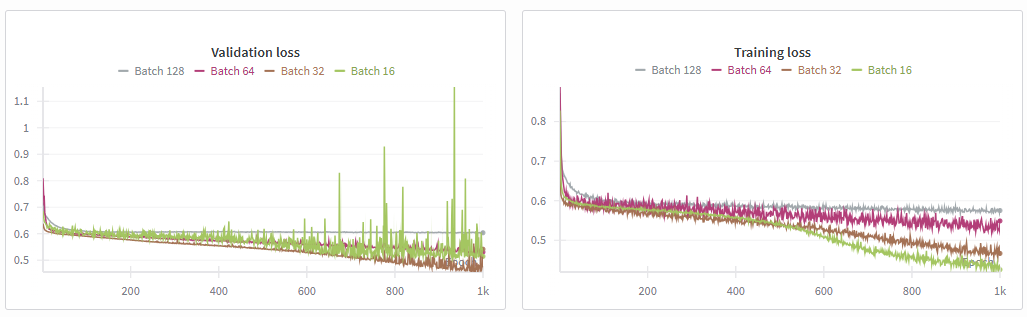

Batch Size에 따른 Validation Loss는
16일 때 과하게 진동하는 것을 볼 수 있고
32일 때 가장 낮은 것을 볼 수 있으며
64일 때 평범하고
128일 때 손실이 심하다고 판단이 된다.

Training Loss는
16일 때 낮지만 과하게 진동하는 것을 볼 수 있고
32일 때 낮고 비교적 안정적이라고 볼 수 있으며
64일 때 평범하고
128일 때 손실이 심하다고 판단이 된다.

#### **Sigmoid**

In [27]:
import torch
from torch import nn, optim
from torch.utils.data import random_split, DataLoader
from datetime import datetime
import wandb
import argparse

from pathlib import Path
BASE_PATH = str(Path().resolve().parent)
print("BASE_PATH:", BASE_PATH)


import sys
sys.path.append(BASE_PATH)

from _03_homeworks.homework_2.titanic_dataset \
  import get_preprocessed_dataset as TitanicDataset


def get_data():
  train_dataset, validation_dataset, test_dataset = TitanicDataset()

  train_data_loader = DataLoader(dataset=train_dataset, batch_size=wandb.config.batch_size, shuffle=True)
  validation_data_loader = DataLoader(dataset=validation_dataset, batch_size=len(validation_dataset))
  return train_data_loader, validation_data_loader
    
class MyModel(nn.Module):
  def __init__(self, n_input, n_output):
    super().__init__()

    self.model = nn.Sequential(
      nn.Linear(n_input, wandb.config.n_hidden_unit_list[0]),
      nn.Sigmoid(),
      nn.Linear(wandb.config.n_hidden_unit_list[0], wandb.config.n_hidden_unit_list[1]),
      nn.Sigmoid(),
      nn.Linear(wandb.config.n_hidden_unit_list[1], n_output),
    )
  def forward(self, x):
    x = self.model(x)
    return x
      
def get_model_and_optimizer():
  my_model = MyModel(n_input=10, n_output=1)
  optimizer = optim.SGD(my_model.parameters(), lr=wandb.config.learning_rate)

  return my_model, optimizer


def training_loop(model, optimizer, train_data_loader, validation_data_loader):
  n_epochs = wandb.config.epochs
  loss_fn = nn.BCEWithLogitsLoss()
  next_print_epoch = 100

  for epoch in range(1, n_epochs + 1):
    loss_train = 0.0
    num_trains = 0
    for train_batch in train_data_loader:
      input=train_batch['input']
      target=train_batch['target'].unsqueeze(1).float()
      output_train = model(input)
      loss = loss_fn(output_train, target)
      loss_train += loss.item()
      num_trains += 1

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    loss_validation = 0.0
    num_validations = 0
    with torch.no_grad():
      for validation_batch in validation_data_loader:
        input=validation_batch['input']
        target=validation_batch['target'].unsqueeze(1).float()
        output_validation = model(input)
        loss = loss_fn(output_validation, target)
        loss_validation += loss.item()
        num_validations += 1

    wandb.log({
      "Epoch": epoch,
      "Training loss": loss_train / num_trains,
      "Validation loss": loss_validation / num_validations
    },step=epoch)

    if epoch >= next_print_epoch:
      print(
        f"Epoch {epoch}, "
        f"Training loss {loss_train / num_trains:.4f}, "
        f"Validation loss {loss_validation / num_validations:.4f}"
      )
      next_print_epoch += 100


def main(args):
  current_time_str = datetime.now().astimezone().strftime('%Y-%m-%d_%H-%M-%S')

  config = {
    'epochs': args.epochs,
    'batch_size': args.batch_size,
    'learning_rate': 1e-3,
    'n_hidden_unit_list': [20, 20],
  }

  wandb.init(
    mode="online" if args.wandb else "disabled",
    project="titanic_survival_prediction",
    notes="Titanic dataset binary classification",
    tags=["titanic", "classification"],
    name=current_time_str,
    config=config
  )
  print(args)
  print(wandb.config)
  train_data_loader, validation_data_loader = get_data()
  linear_model, optimizer = get_model_and_optimizer()

  print("#" * 50, 1)

  training_loop(
    model=linear_model,
    optimizer=optimizer,
    train_data_loader=train_data_loader,
    validation_data_loader=validation_data_loader
  )
  wandb.finish()

BASE_PATH: C:\Users\kmka0\git\link_dl


In [28]:
if __name__ == "__main__":
  parser = argparse.ArgumentParser()

  parser.add_argument(
    "--wandb", action=argparse.BooleanOptionalAction, default=True, help="True or False"
  )

  parser.add_argument(
    "-b", "--batch_size", type=int, default=512, help="Batch size (int, default: 512)"
  )

  parser.add_argument(
    "-e", "--epochs", type=int, default=1_000, help="Number of training epochs (int, default:1_000)"
  )

  args,unknown = parser.parse_known_args()

  main(args)

Namespace(wandb=True, batch_size=512, epochs=1000)
{'epochs': 1000, 'batch_size': 512, 'learning_rate': 0.001, 'n_hidden_unit_list': [20, 20]}


C:\Users\kmka0\git\link_dl\_03_homeworks\homework_2\titanic_dataset.py:128: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_df["alone"].fillna(0, inplace=True)
C:\Users\kmka0\git\link_dl\_03_homeworks\homework_2\titanic_dataset.py:147: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'title', 'family_num', 'alone'],
      dtype='object')
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  title  \
0       0.0       3    1  22.0      1      0   7.2500         2      2   
1       1.0       1    0  38.0      1      0  71.2833         0      3   
2       1.0       3    0  26.0      0      0   7.9250         2      1   
3       1.0       1    0  35.0      1      0  53.1000         2      3   
4       0.0       3    1  35.0      0      0   8.0500         2      2   
5       0.0       3    1  29.0      0      0   8.4583         1      2   
6       0.0       1    1  54.0      0      0  51.8625         2      2   
7       0.0       3    1   2.0      3      1  21.0750         2      0   
8       1.0       3    0  27.0      0      2  11.1333         2      3   
9       1.0       2    0  14.0      1      0  30.0708         0      3   

   family_num  alone  
0           1    0.

Epoch,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▆▆▇▇▇▇▇▇█████
Training loss,█▇▇▆▆▃▃▃▃▃▃▃▂▃▂▂▂▂▂▂▃▂▂▃▁▃▂▂▃▁▁▁▃▂▁▂▂▂▂▁
Validation loss,█▇▇▇▆▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
Epoch,1000
Training loss,0.6718
Validation loss,0.66082


#### **ELU**

In [29]:
class MyModel(nn.Module):
  def __init__(self, n_input, n_output):
    super().__init__()

    self.model = nn.Sequential(
      nn.Linear(n_input, wandb.config.n_hidden_unit_list[0]),
      nn.ELU(),
      nn.Linear(wandb.config.n_hidden_unit_list[0], wandb.config.n_hidden_unit_list[1]),
      nn.ELU(),
      nn.Linear(wandb.config.n_hidden_unit_list[1], n_output),
    )
  def forward(self, x):
    x = self.model(x)
    return x
      
def get_model_and_optimizer():
  my_model = MyModel(n_input=10, n_output=1)
  optimizer = optim.SGD(my_model.parameters(), lr=wandb.config.learning_rate)

  return my_model, optimizer
    
if __name__ == "__main__":
  parser = argparse.ArgumentParser()

  parser.add_argument(
    "--wandb", action=argparse.BooleanOptionalAction, default=True, help="True or False"
  )

  parser.add_argument(
    "-b", "--batch_size", type=int, default=512, help="Batch size (int, default: 512)"
  )

  parser.add_argument(
    "-e", "--epochs", type=int, default=1_000, help="Number of training epochs (int, default:1_000)"
  )

  args,unknown = parser.parse_known_args()

  main(args)

Namespace(wandb=True, batch_size=512, epochs=1000)
{'epochs': 1000, 'batch_size': 512, 'learning_rate': 0.001, 'n_hidden_unit_list': [20, 20]}


C:\Users\kmka0\git\link_dl\_03_homeworks\homework_2\titanic_dataset.py:128: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_df["alone"].fillna(0, inplace=True)
C:\Users\kmka0\git\link_dl\_03_homeworks\homework_2\titanic_dataset.py:147: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'title', 'family_num', 'alone'],
      dtype='object')
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  title  \
0       0.0       3    1  22.0      1      0   7.2500         2      2   
1       1.0       1    0  38.0      1      0  71.2833         0      3   
2       1.0       3    0  26.0      0      0   7.9250         2      1   
3       1.0       1    0  35.0      1      0  53.1000         2      3   
4       0.0       3    1  35.0      0      0   8.0500         2      2   
5       0.0       3    1  29.0      0      0   8.4583         1      2   
6       0.0       1    1  54.0      0      0  51.8625         2      2   
7       0.0       3    1   2.0      3      1  21.0750         2      0   
8       1.0       3    0  27.0      0      2  11.1333         2      3   
9       1.0       2    0  14.0      1      0  30.0708         0      3   

   family_num  alone  
0           1    0.

Epoch,▁▁▂▂▂▂▂▂▂▂▃▃▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇██
Training loss,█▇█▇▇▆▃▅▅▄▃▄▂▂▃▂▃▂▃▃▂▂▂▃▂▂▂▂▂▂▂▂▂▂▂▂▁▃▁▂
Validation loss,█▇▇▇▇▇▆▆▆▆▅▄▄▄▄▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
Epoch,1000
Training loss,0.58724
Validation loss,0.61601


#### **Leaky ReLU**

In [30]:
class MyModel(nn.Module):
  def __init__(self, n_input, n_output):
    super().__init__()

    self.model = nn.Sequential(
      nn.Linear(n_input, wandb.config.n_hidden_unit_list[0]),
      nn.LeakyReLU(negative_slope=0.01),
      nn.Linear(wandb.config.n_hidden_unit_list[0], wandb.config.n_hidden_unit_list[1]),
      nn.LeakyReLU(negative_slope=0.01),
      nn.Linear(wandb.config.n_hidden_unit_list[1], n_output),
    )
  def forward(self, x):
    x = self.model(x)
    return x
      
def get_model_and_optimizer():
  my_model = MyModel(n_input=10, n_output=1)
  optimizer = optim.SGD(my_model.parameters(), lr=wandb.config.learning_rate)

  return my_model, optimizer
    
if __name__ == "__main__":
  parser = argparse.ArgumentParser()

  parser.add_argument(
    "--wandb", action=argparse.BooleanOptionalAction, default=True, help="True or False"
  )

  parser.add_argument(
    "-b", "--batch_size", type=int, default=512, help="Batch size (int, default: 512)"
  )

  parser.add_argument(
    "-e", "--epochs", type=int, default=1_000, help="Number of training epochs (int, default:1_000)"
  )

  args,unknown = parser.parse_known_args()

  main(args)

Namespace(wandb=True, batch_size=512, epochs=1000)
{'epochs': 1000, 'batch_size': 512, 'learning_rate': 0.001, 'n_hidden_unit_list': [20, 20]}


C:\Users\kmka0\git\link_dl\_03_homeworks\homework_2\titanic_dataset.py:128: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_df["alone"].fillna(0, inplace=True)
C:\Users\kmka0\git\link_dl\_03_homeworks\homework_2\titanic_dataset.py:147: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'title', 'family_num', 'alone'],
      dtype='object')
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  title  \
0       0.0       3    1  22.0      1      0   7.2500         2      2   
1       1.0       1    0  38.0      1      0  71.2833         0      3   
2       1.0       3    0  26.0      0      0   7.9250         2      1   
3       1.0       1    0  35.0      1      0  53.1000         2      3   
4       0.0       3    1  35.0      0      0   8.0500         2      2   
5       0.0       3    1  29.0      0      0   8.4583         1      2   
6       0.0       1    1  54.0      0      0  51.8625         2      2   
7       0.0       3    1   2.0      3      1  21.0750         2      0   
8       1.0       3    0  27.0      0      2  11.1333         2      3   
9       1.0       2    0  14.0      1      0  30.0708         0      3   

   family_num  alone  
0           1    0.

Epoch,▁▁▁▁▁▁▂▂▂▃▃▃▃▃▃▃▄▄▄▄▄▄▄▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇██
Training loss,█▅▅▅▂▂▂▂▂▂▁▁▂▁▂▂▂▁▂▂▂▂▂▁▂▂▁▁▁▂▂▁▁▂▂▁▂▂▁▁
Validation loss,█▄▃▂▂▁▁▁▁▁▁▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂
Epoch,1000
Training loss,0.58166
Validation loss,0.65517


#### **Result**

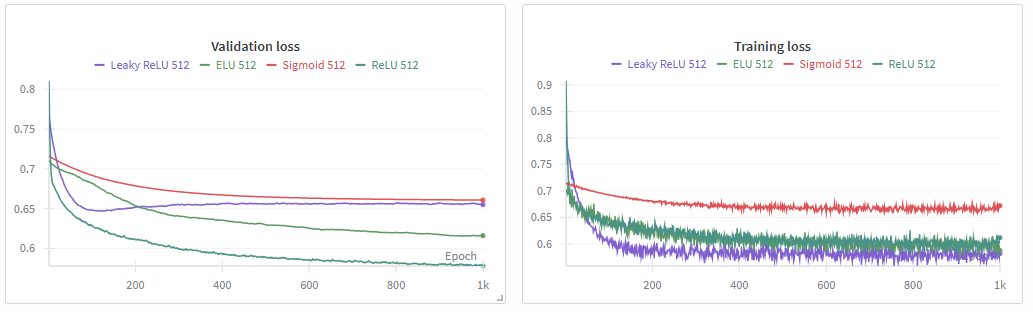

Activation Function에 따른 Validation Loss는
Leaky ReLU일 때 초반에 낮지만 200~400 구간에서 ELU보다 높은 손실을 발생시키고 있고
ELU일 때 평범하고
ReLU일 때 가장 낮은 손실이 발생하고 있고
Sigmoid일 때 손실이 심하다고 판단이 된다.

Training Loss는
Leaky ReLU일 때 가장 낮은 손실을 발생시키고 있고
ELU와 ReLU일 때 평범하고
Sigmoid일 때 손실이 심하다고 판단이 된다.

# **요구사항3 테스트 및 submission.csv 생성**

요구사항 2에서 살펴봤을때 Batch Size가 32일 때 그리고 Activation Function이 ReLU일 때를 이용하여 모델을 구성하였다.

In [18]:
import torch
from torch import nn, optim
from torch.utils.data import random_split, DataLoader
from datetime import datetime
import wandb
import argparse
import pandas as pd

from pathlib import Path
BASE_PATH = str(Path().resolve().parent)
print("BASE_PATH:", BASE_PATH)


import sys
sys.path.append(BASE_PATH)

from _03_homeworks.homework_2.titanic_dataset \
  import get_preprocessed_dataset as TitanicDataset


def get_data():
    train_dataset, validation_dataset, test_dataset = TitanicDataset()
    train_data_loader = DataLoader(dataset=train_dataset, batch_size=wandb.config.batch_size, shuffle=True)
    validation_data_loader = DataLoader(dataset=validation_dataset, batch_size=len(validation_dataset))
    return train_data_loader, validation_data_loader, test_dataset

    
class MyModel(nn.Module):
  def __init__(self, n_input, n_output):
    super().__init__()

    self.model = nn.Sequential(
      nn.Linear(n_input, wandb.config.n_hidden_unit_list[0]),
      nn.ReLU(),
      nn.Linear(wandb.config.n_hidden_unit_list[0], wandb.config.n_hidden_unit_list[1]),
      nn.ReLU(),
      nn.Linear(wandb.config.n_hidden_unit_list[1], n_output),
    )
  def forward(self, x):
    x = self.model(x)
    return x
      
def get_model_and_optimizer():
  my_model = MyModel(n_input=10, n_output=1)
  optimizer = optim.SGD(my_model.parameters(), lr=wandb.config.learning_rate)

  return my_model, optimizer

def training_loop(model, optimizer, train_data_loader, validation_data_loader):
  n_epochs = wandb.config.epochs
  loss_fn = nn.BCEWithLogitsLoss()
  next_print_epoch = 100
  best_val_loss=float('inf') #val_loss값 최소인지 확인하기위해
    
  for epoch in range(1, n_epochs + 1):
    model.train()
    loss_train = 0.0
    num_trains = 0
    for train_batch in train_data_loader:
      input=train_batch['input']
      target=train_batch['target'].unsqueeze(1).float()
      output_train = model(input)
      loss = loss_fn(output_train, target)
      loss_train += loss.item()
      num_trains += 1

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    
    model.eval()
    loss_validation = 0.0
    num_validations = 0
    with torch.no_grad():
      for validation_batch in validation_data_loader:
        input=validation_batch['input']
        target=validation_batch['target'].unsqueeze(1).float()
        output_validation = model(input)
        loss = loss_fn(output_validation, target)
        loss_validation += loss.item()
        num_validations += 1

    avg_val_loss=loss_validation/num_validations

    if avg_val_loss<best_val_loss:
        best_val_loss=avg_val_loss
        torch.save(model.state_dict(),"best_model.pth")
        
    wandb.log({
      "Epoch": epoch,
      "Training loss": loss_train / num_trains,
      "Validation loss": loss_validation / num_validations
    },step=epoch)

    if epoch >= next_print_epoch:
      print(
        f"Epoch {epoch}, "
        f"Training loss {loss_train / num_trains:.4f}, "
        f"Validation loss {loss_validation / num_validations:.4f}"
      )
      next_print_epoch += 100

def generate_submission(model,test_dataset,test_df):
    model.load_state_dict(torch.load("best_model.pth"))
    model.eval()

    test_loader=DataLoader(dataset=test_dataset,batch_size=wandb.config.batch_size,shuffle=False)

    predictions=[]

    with torch.no_grad():
        for batch in test_loader:
            input=batch['input']
            output=model(input)
            preds=(torch.sigmoid(output)>0.5).int().squeeze(1)
            predictions.extend(preds.cpu().numpy())
    submission_df=pd.DataFrame({"PassengerId": test_df["PassengerId"],"Survived":predictions})
    submission_df.to_csv("submission.csv",index=False)
    
def main(args):
  current_time_str = datetime.now().astimezone().strftime('%Y-%m-%d_%H-%M-%S')

  config = {
    'epochs': args.epochs,
    'batch_size': args.batch_size,
    'learning_rate': 1e-3,
    'n_hidden_unit_list': [20, 20],
  }

  wandb.init(
    mode="online" if args.wandb else "disabled",
    project="titanic_survival_prediction",
    notes="Titanic dataset binary classification",
    tags=["titanic", "classification"],
    name=current_time_str,
    config=config
  )
  print(args)
  print(wandb.config)
  train_data_loader, validation_data_loader,test_dataset = get_data()
  test_df = pd.read_csv(BASE_PATH + "/_03_homeworks/homework_2/test.csv")
  linear_model, optimizer = get_model_and_optimizer()

  print("#" * 50, 1)

  training_loop(
    model=linear_model,
    optimizer=optimizer,
    train_data_loader=train_data_loader,
    validation_data_loader=validation_data_loader
  )
  generate_submission(linear_model,test_dataset,test_df)
  wandb.finish()
if __name__ == "__main__":
  parser = argparse.ArgumentParser()

  parser.add_argument(
    "--wandb", action=argparse.BooleanOptionalAction, default=True, help="True or False"
  )

  parser.add_argument(
    "-b", "--batch_size", type=int, default=32, help="Batch size (int, default: 512)"
  )

  parser.add_argument(
    "-e", "--epochs", type=int, default=1_000, help="Number of training epochs (int, default:1_000)"
  )

  args,unknown = parser.parse_known_args()

  main(args)

BASE_PATH: C:\Users\kmka0\git\link_dl


Namespace(wandb=True, batch_size=32, epochs=1000)
{'epochs': 1000, 'batch_size': 32, 'learning_rate': 0.001, 'n_hidden_unit_list': [20, 20]}


C:\Users\kmka0\git\link_dl\_03_homeworks\homework_2\titanic_dataset.py:128: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_df["alone"].fillna(0, inplace=True)
C:\Users\kmka0\git\link_dl\_03_homeworks\homework_2\titanic_dataset.py:147: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'title', 'family_num', 'alone'],
      dtype='object')
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  title  \
0       0.0       3    1  22.0      1      0   7.2500         2      2   
1       1.0       1    0  38.0      1      0  71.2833         0      3   
2       1.0       3    0  26.0      0      0   7.9250         2      1   
3       1.0       1    0  35.0      1      0  53.1000         2      3   
4       0.0       3    1  35.0      0      0   8.0500         2      2   
5       0.0       3    1  29.0      0      0   8.4583         1      2   
6       0.0       1    1  54.0      0      0  51.8625         2      2   
7       0.0       3    1   2.0      3      1  21.0750         2      0   
8       1.0       3    0  27.0      0      2  11.1333         2      3   
9       1.0       2    0  14.0      1      0  30.0708         0      3   

   family_num  alone  
0           1    0.

Epoch,▁▁▁▁▂▂▃▃▃▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▅▆▆▆▇▇▇▇▇▇█████
Training loss,█████▇▇▇▇▇▇▆▇▇▆▆▆▆▅▅▄▅▄▄▄▄▄▄▃▄▄▃▃▃▃▂▂▂▁▁
Validation loss,████▇▇▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▅▅▅▄▄▄▄▄▃▃▂▂▂▅▁▂▂▂
Epoch,1000
Training loss,0.47478
Validation loss,0.5264


# **요구사항4 submission.csv 제출 및 등수 확인**

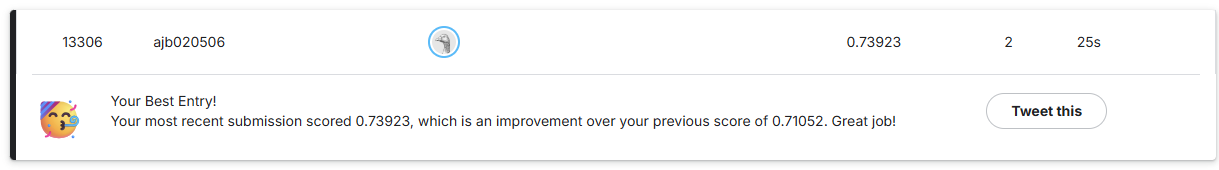